In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator
print('Keras version:', keras.__version__)
import os
from os.path import join
import random
import itertools
import datetime
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import *
import hgtk
from PIL import ImageFont, Image, ImageDraw
from matplotlib import pyplot as plt
from collections import Counter
import datetime
import re
import OCR_utils as ocr

Keras version: 2.1.4


In [2]:
# 현실에서 쓰이는 단어들의 조합을 반영하기 위해 현대 한국/영문 소설에 쓰인 단어들을 잘라 단어 list를 생성

kor_train = np.loadtxt('./text/train_kor_words.txt', dtype = np.str)
kor_test = np.loadtxt('./text/test_kor_words.txt', dtype = np.str)
eng_train = np.loadtxt('./text/train_eng_words.txt', dtype = np.str)
eng_test = np.loadtxt('./text/test_eng_words.txt', dtype = np.str)
print(eng_train[0:10])
print(kor_train[0:10])


#각 character에 해당하는 번호를 부여하는 dictionary
print('------------------------------------dictionary------------------------------------')
dictionary = ocr.load_dictionary()
print(dictionary)


['ribband' 'liver' 'loafing' 'Lady' 'cannons' 'lords' 'Hang' 'mark'
 'sighed' 'thinand']
['어림' '봄쯤' '보는' '마셔' '로의' '덮칠' '준대' '꽂기' '관선' '끊는']
------------------------------------dictionary------------------------------------
{'-': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52, 'ㄱ': 53, 'ㄲ': 54, 'ㄳ': 55, 'ㄴ': 56, 'ㄵ': 57, 'ㄶ': 58, 'ㄷ': 59, 'ㄸ': 60, 'ㄹ': 61, 'ㄺ': 62, 'ㄽ': 63, 'ㄿ': 64, 'ㄻ': 65, 'ㄼ': 66, 'ㄾ': 67, 'ㅀ': 68, 'ㅁ': 69, 'ㅂ': 70, 'ㅃ': 71, 'ㅄ': 72, 'ㅅ': 73, 'ㅆ': 74, 'ㅇ': 75, 'ㅈ': 76, 'ㅉ': 77, 'ㅊ': 78, 'ㅋ': 79, 'ㅌ': 80, 'ㅍ': 81, 'ㅎ': 82, 'ㅏ': 83, 'ㅐ': 84, 'ㅑ': 85, 'ㅒ': 86, 'ㅓ

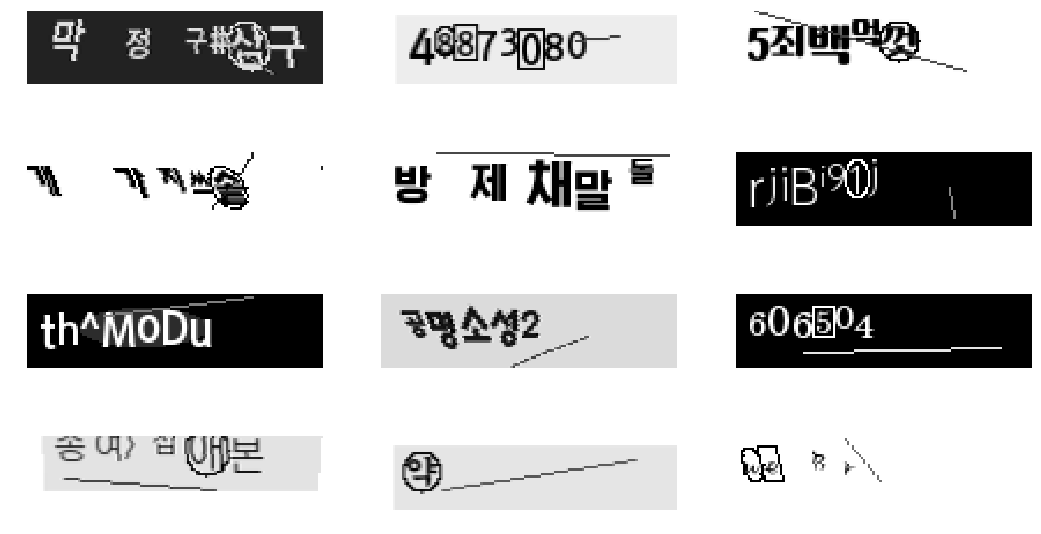

In [3]:
#font source : http://www.asiafont.com/asfont/am_down.php" 
font_path = "./fonts/"
font_list = os.listdir(font_path)

#생성 이미지 예시
w=4
h=3
fig=plt.figure(figsize=(18, 10))
for i in range(1,w*h+1):
    img = ocr.text_img_generator(128,32,kor_train,eng_train,font_path)[0]
    img = np.array(img)
    fig.add_subplot(w,h,i)
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
plt.show()

(64, 32, 128, 1)


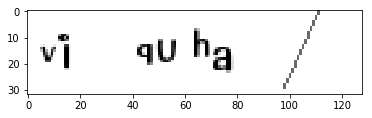

In [4]:
train_generator = ocr.DataGenerator(batch_size=64, x_dim=(32,128), kor_source = kor_train, eng_source = eng_train, text_length = 15, dictionary = dictionary, font_path=font_path,text_generator = ocr.text_img_generator)
test_generator = ocr.DataGenerator(batch_size=500, x_dim=(32,128), kor_source = kor_test, eng_source = eng_test, text_length = 15, dictionary = dictionary, font_path=font_path,text_generator = ocr.text_img_generator)
batch_x, batch_y = train_generator.data_generation()
print(batch_x.shape)
plt.imshow(batch_x[0,:,:,0],cmap = 'gray')
plt.show()